# Limpieza del dataset
Hacemos la carga inicial del dataset y un análisis incial

In [427]:
import pandas as pd

# This assumes you have a file named 'california_housing.csv' in a 'resources' folder.
# You would need to uncomment the lines below to run them.

file_path = '../resources/Supplement_Sales_Weekly_Expanded.csv'
try:
    df_revenue = pd.read_csv(file_path)
    print("Successfully loaded DataFrame from CSV:")
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")



# You can now work with the DataFrame 'df'.
# Let's display its info to verify it matches the description in the markdown file.
print("DataFrame Info:")
df_revenue.info()

print("\nFirst 5 rows of the DataFrame:")
print(df_revenue.head())


Successfully loaded DataFrame from CSV:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB

First 5 rows of the DataFrame:
         Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.

El análisis no muestra valores nulos. Pasamos a buscar potenciales valores anómalos

# Analisis de valores anomalos

Generating box plots to visually inspect for outliers...


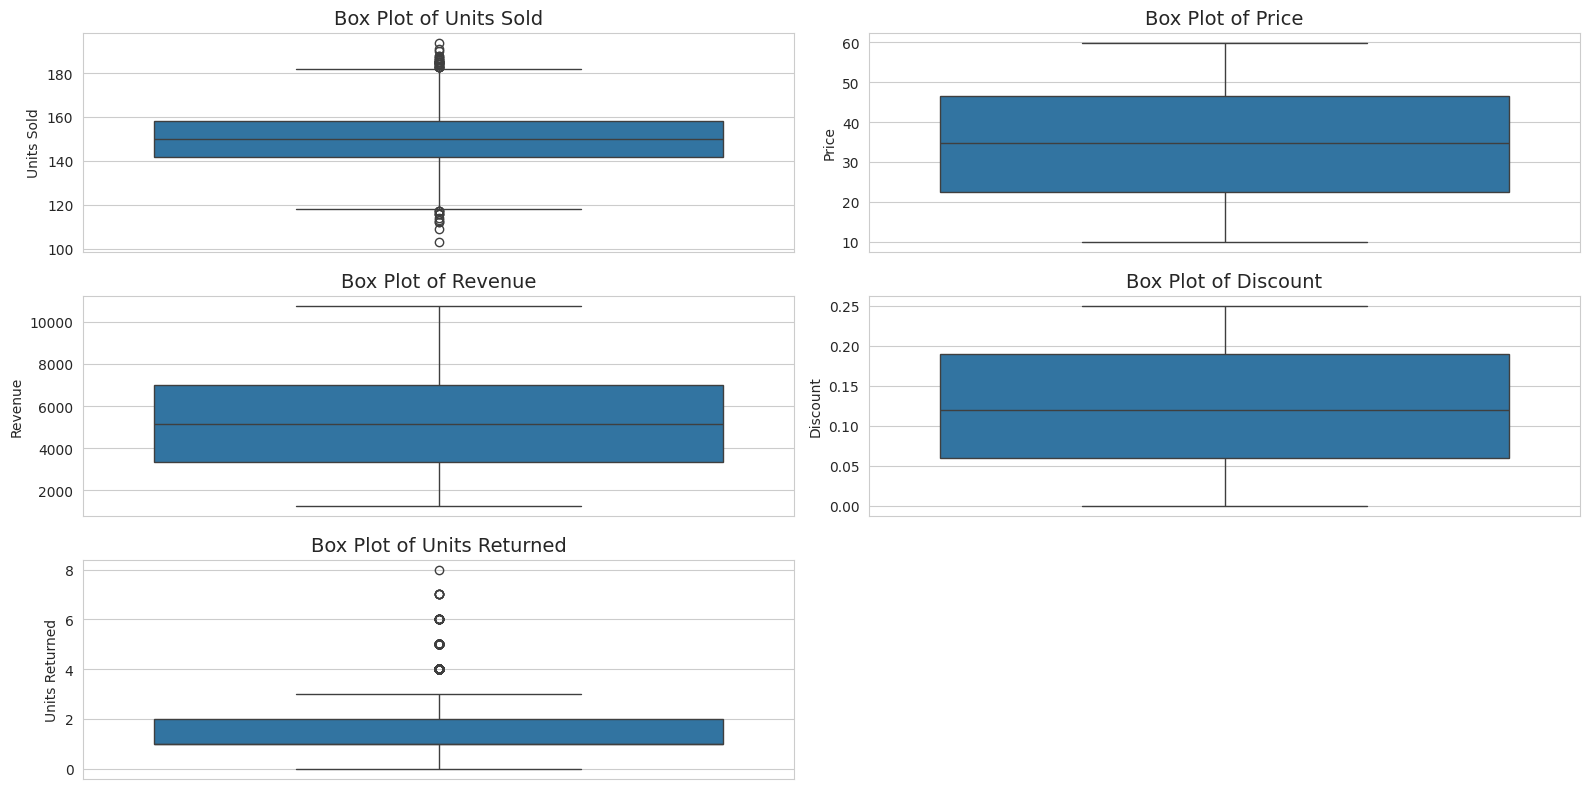

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Outlier Detection Code ---

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Select a few features to inspect for outliers
features_to_plot = ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']

print("Generating box plots to visually inspect for outliers...")

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i + 1 )
    sns.boxplot(y=df_revenue[feature])
    plt.title(f'Box Plot of {feature}', fontsize=14)

plt.tight_layout()
plt.show()


Los gráficos de Box Plot muestran valores atípicos pra las unidades devueltas (superior a 4 unidades devueltas) y para unidades vendidas (mas de 180 y menos de 120). Esto no significa que los datos esten mal, si no que hay productos que se venden mas o menos que otros que otros y que hay productos que se devuelven mas que otros. Pasemos a analizar con mas detalle esos productos.

In [429]:
import pandas as pd
from sklearn.calibration import column_or_1d

column = 'Units Sold'

Q1 = df_revenue[column].quantile(0.25)
Q3 = df_revenue[column].quantile(0.75)
IQR = Q3 - Q1

# Outliers limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df_revenue[(df_revenue[column] < lower_bound) | (df_revenue[column] > upper_bound)]

print(f"Outliers detectados para '{column}': {len(outliers)}")
print(outliers)

Outliers detectados para 'Units Sold': 40
            Date        Product Name     Category  Units Sold  Price  \
71    2020-02-03                Zinc      Mineral         184  36.17   
109   2020-02-17   Green Tea Extract   Fat Burner         117  26.94   
131   2020-03-02        Multivitamin      Vitamin         184  11.95   
212   2020-04-06         Pre-Workout  Performance         116  53.34   
223   2020-04-06  Electrolyte Powder    Hydration         185  43.15   
247   2020-04-20                Zinc      Mineral         188  30.18   
465   2020-07-27           Vitamin C      Vitamin         183  33.92   
722   2020-11-16            Fish Oil        Omega         194  51.09   
766   2020-11-30     Iron Supplement      Mineral         184  24.97   
794   2020-12-14         Ashwagandha       Herbal         185  26.93   
906   2021-02-01         Ashwagandha       Herbal         186  34.74   
1123  2021-05-10        Multivitamin      Vitamin         184  12.67   
1279  2021-07-12  Elec

In [430]:
import pandas as pd
from sklearn.calibration import column_or_1d

column = 'Units Returned'

Q1 = df_revenue[column].quantile(0.25)
Q3 = df_revenue[column].quantile(0.75)
IQR = Q3 - Q1

# Outliers limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df_revenue[(df_revenue[column] < lower_bound) | (df_revenue[column] > upper_bound)]

print(f"Outliers detectados para '{column}': {len(outliers)}")
print(outliers)

Outliers detectados para 'Units Returned': 314
            Date       Product Name    Category  Units Sold  Price  Revenue  \
28    2020-01-13             Biotin     Vitamin         161  18.87  3038.07   
33    2020-01-20          Vitamin C     Vitamin         149  22.33  3327.17   
49    2020-01-27          Vitamin C     Vitamin         163  35.90  5851.70   
59    2020-01-27          Melatonin   Sleep Aid         156  38.27  5970.12   
76    2020-02-03             Biotin     Vitamin         162  58.36  9454.32   
...          ...                ...         ...         ...    ...      ...   
4317  2025-03-03  Green Tea Extract  Fat Burner         154  48.14  7413.56   
4321  2025-03-10          Vitamin C     Vitamin         166  44.32  7357.12   
4353  2025-03-24          Vitamin C     Vitamin         136  58.55  7962.80   
4363  2025-03-24          Melatonin   Sleep Aid         178  13.04  2321.12   
4370  2025-03-31           Fish Oil       Omega         139  44.67  6209.13   

    

No podemos determinar si los datos son erroneos o no. Ventas mayores o menores de lo normal se puede deber a la calidad del producto vendido o a descuentos promocionales. 

Lo mismo se puede decir para las unidades devueltas.

**Conclusión.** Los valores anómalos detectados se consideran validos y no se van a a eliminar o borrar.

# Entrenamiento del modelo para predecir ingresos

Como nuestro objetivo es predecir ingresos, debemos eliminar todas las columnas que esten relacionadas con los ingresos como pueden ser el precio unitario, los descuentos, las devoluciones... Para ello, vamos a comparar los ingresos con el resto de las variables para ver cuales de ellas podrian ser utiles para entrenar nuestro modelo.

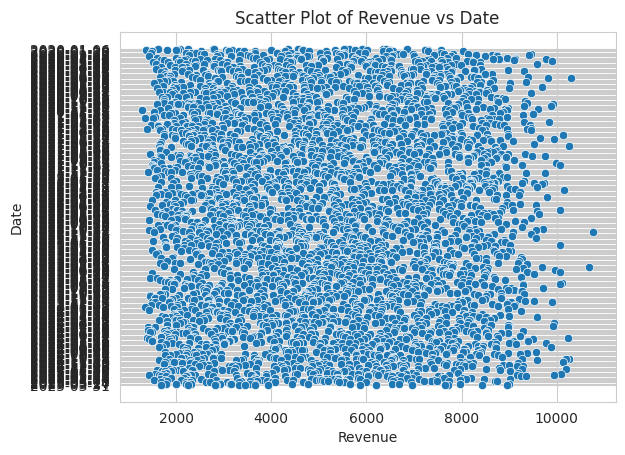

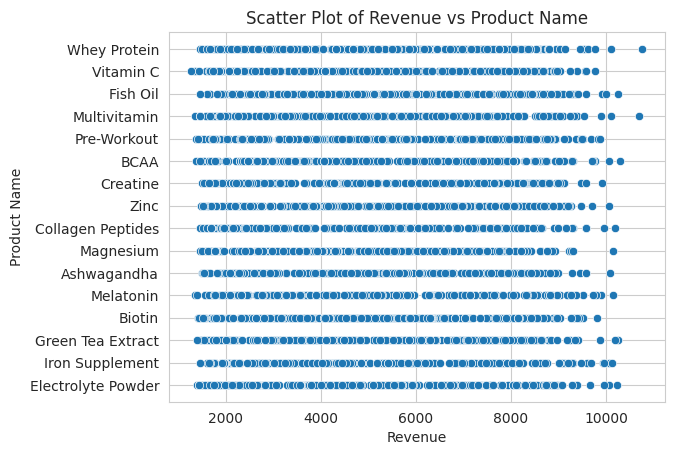

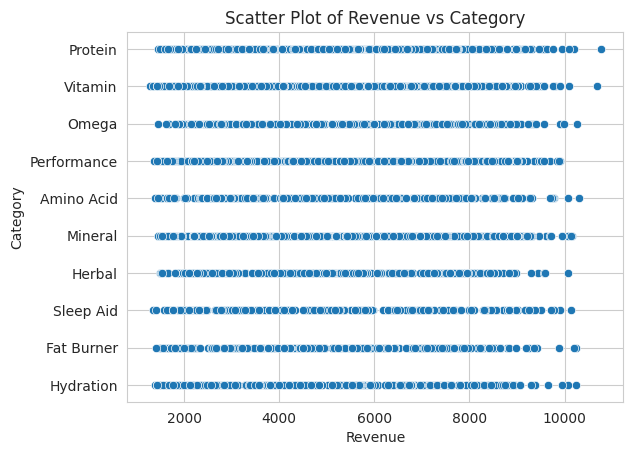

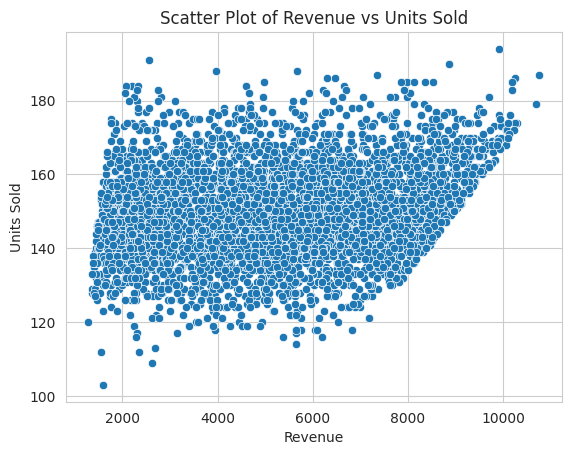

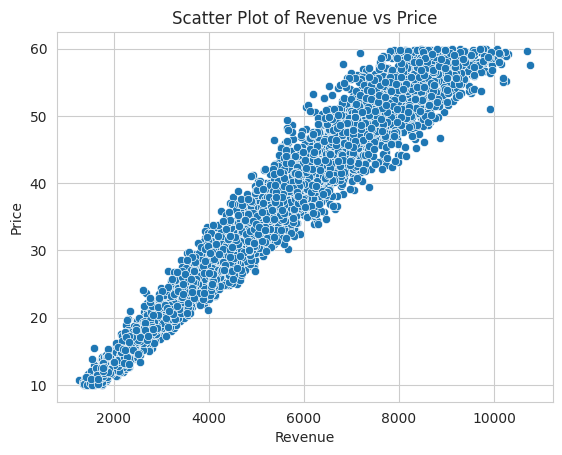

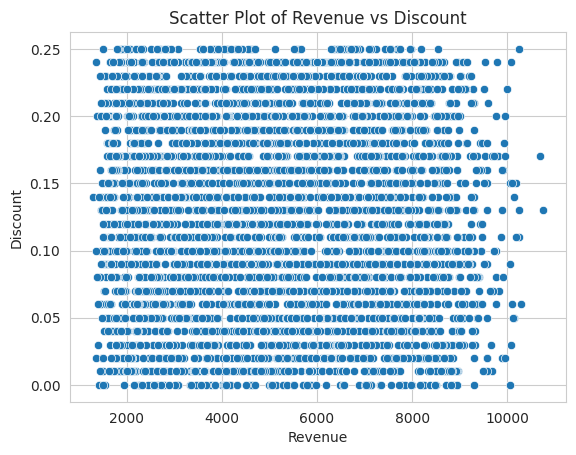

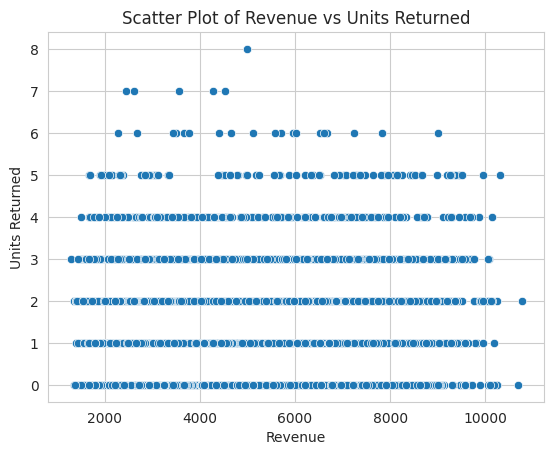

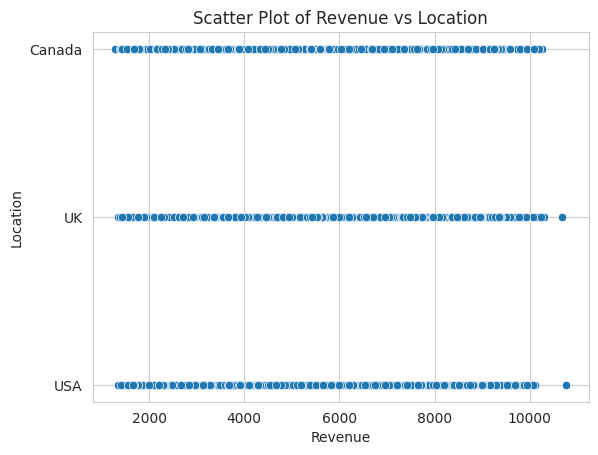

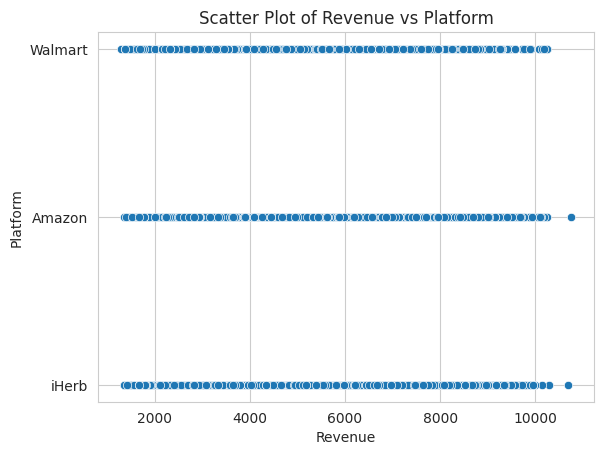

In [431]:
for field in df_revenue.columns:
    if field == 'Revenue':
        continue

    sns.scatterplot(x='Revenue', y=field, data=df_revenue)
    plt.title(f'Scatter Plot of Revenue vs {field}')
    plt.show()

Podemos ver que solo las unidades vendidas y el precio muestran alguna tendencia de correlación. Sin embargo en nuestro dataset, las ganancias se pueden calcular multiplicando las unidades vendidas por el precio, por lo que no podemos incluirlas en nuestro modelo. El resto de las distribuciones sugieren que no existe correlación ninguna entre ellas, con lo que es seguro incluirlas en nuestro modelo. Esto tambien sugiere que los **modelos de regresion linear no van a dar buenos resultados** y que deberiamos optar por otros.

In [432]:
# Drop columns that can affect the revenue
# columns_to_drop = ['Units Sold', 'Price', 'Discount', 'Units Returned']
# columns_to_drop = ['Units Sold', 'Price', 'Discount', 'Units Returned', 'Product Name', 'Category', 'Platform', 'Location']
columns_to_drop = ['Units Sold', 'Price']

df_revenue = df_revenue.drop(columns=columns_to_drop)

display(df_revenue)

,Date,Product Name,Category,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,2819.74,0.23,2,Canada,Amazon


No podemos procesar texto en los modelos, por lo que asignaremos un número a cada uno de los valores categóricos. Existe en pandas un método llamado `get_dummies` que convierte los valores categóricos en una o mas columnas a valores binarios (o a Os y 1s).

In [433]:
# Convert categoric columns to boolean values
df_revenue = pd.get_dummies(df_revenue, columns=['Product Name', 'Category', 'Location', 'Platform'], dtype=int)

display(df_revenue)

,Date,Revenue,Discount,Units Returned,Product Name_Ashwagandha,Product Name_BCAA,Product Name_Biotin,Product Name_Collagen Peptides,Product Name_Creatine,Product Name_Electrolyte Powder,...,Category_Performance,Category_Protein,Category_Sleep Aid,Category_Vitamin,Location_Canada,Location_UK,Location_USA,Platform_Amazon,Platform_Walmart,Platform_iHerb
0,2020-01-06,4573.14,0.03,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2020-01-06,5908.89,0.04,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,2020-01-06,2078.51,0.25,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2020-01-06,2249.80,0.08,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,2020-01-06,5568.79,0.25,3,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,7646.40,0.21,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4380,2025-03-31,5870.48,0.22,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4381,2025-03-31,2835.60,0.12,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4382,2025-03-31,2819.74,0.23,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


Para el caso de las fechas, podemos crear los siguientes valores numéricos:
- Año
- Día
- Mes
- Día de la semana
- Día del año
- ¿Es fin de semana?

In [434]:
# Convert date to a format Pandas can understand
df_revenue['date'] = pd.to_datetime(df_revenue['Date'])

# Extract year, day, month...
df_revenue['Year'] = df_revenue['date'].dt.year
df_revenue['Month'] = df_revenue['date'].dt.month
df_revenue['Day'] = df_revenue['date'].dt.day
df_revenue['Day Of Week'] = df_revenue['date'].dt.day_of_week + 1 # 1 -> Monday, 7 -> Sunday
df_revenue['Day Of Year'] = df_revenue['date'].dt.day_of_year
df_revenue['Is Weekend'] = (df_revenue['date'].dt.dayofweek >= 6).astype(int)

# Drop the date columns (original and temporal)
df_revenue = df_revenue.drop(columns=['Date', 'date'])

display(df_revenue)



,Revenue,Discount,Units Returned,Product Name_Ashwagandha,Product Name_BCAA,Product Name_Biotin,Product Name_Collagen Peptides,Product Name_Creatine,Product Name_Electrolyte Powder,Product Name_Fish Oil,...,Location_USA,Platform_Amazon,Platform_Walmart,Platform_iHerb,Year,Month,Day,Day Of Week,Day Of Year,Is Weekend
0,4573.14,0.03,2,0,0,0,0,0,0,0,...,0,0,1,0,2020,1,6,1,6,0
1,5908.89,0.04,0,0,0,0,0,0,0,0,...,0,1,0,0,2020,1,6,1,6,0
2,2078.51,0.25,0,0,0,0,0,0,0,1,...,0,1,0,0,2020,1,6,1,6,0
3,2249.80,0.08,0,0,0,0,0,0,0,0,...,0,0,1,0,2020,1,6,1,6,0
4,5568.79,0.25,3,0,0,0,0,0,0,0,...,0,0,0,1,2020,1,6,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,7646.40,0.21,1,0,0,0,0,0,0,0,...,1,0,0,1,2025,3,31,1,90,0
4380,5870.48,0.22,1,0,0,1,0,0,0,0,...,0,0,1,0,2025,3,31,1,90,0
4381,2835.60,0.12,3,0,0,0,0,0,0,0,...,1,0,0,1,2025,3,31,1,90,0
4382,2819.74,0.23,2,0,0,0,0,0,0,0,...,0,1,0,0,2025,3,31,1,90,0


Vamos a analizar los nuevos campos creados a partir de la fecha:

In [435]:
fields = ['Year', 'Month', 'Day', 'Day Of Week', 'Day Of Year', 'Is Weekend']

# Print the unique values for the new fields added using the date
for field in fields:
    print(f"Unique values for '{field}': {df_revenue[field].unique()}\n")


Unique values for 'Year': [2020 2021 2022 2023 2024 2025]

Unique values for 'Month': [ 1  2  3  4  5  6  7  8  9 10 11 12]

Unique values for 'Day': [ 6 13 20 27  3 10 17 24  2  9 16 23 30  4 11 18 25  1  8 15 22 29 31  7
 14 21 28  5 12 19 26]

Unique values for 'Day Of Week': [1]

Unique values for 'Day Of Year': [  6  13  20  27  34  41  48  55  62  69  76  83  90  97 104 111 118 125
 132 139 146 153 160 167 174 181 188 195 202 209 216 223 230 237 244 251
 258 265 272 279 286 293 300 307 314 321 328 335 342 349 356 363   4  11
  18  25  32  39  46  53  60  67  74  81  88  95 102 109 116 123 130 137
 144 151 158 165 172 179 186 193 200 207 214 221 228 235 242 249 256 263
 270 277 284 291 298 305 312 319 326 333 340 347 354 361   3  10  17  24
  31  38  45  52  59  66  73  80  87  94 101 108 115 122 129 136 143 150
 157 164 171 178 185 192 199 206 213 220 227 234 241 248 255 262 269 276
 283 290 297 304 311 318 325 332 339 346 353 360   2   9  16  23  30  37
  44  51  58  65  72  79 

Observamos que `Week Of Day` es siempre 1 (Lunes), lo que nos indica que los datos se han recogido de formal semanal (cada Lunes). Podriamos eliminar aquellos valores que son siempre el mismo, pero de momento vamos a dejarlos.

Ya hemos preparado los datos para que puedan ser usados en un modelo (convertido los datos categoricos a valores booleanos). Vamos a pasar ahora a crear:
- Dataset para la variable dependiente:
    - Datos de entrenamiento
    - Datos de test
- Dataset para las variables independientes:
    - Datos de entrenamiento
    - Datos de test

In [436]:

from pyparsing import col

# Create the list of dependent and independent columns
dependent = ['Revenue']
independent = []

for column in df_revenue.columns:
    if column not in dependent:
        independent.append(column)


print("The following are the dependent and independent variables for our model:\n")
print(f"    -Dependent: {dependent}")
print(f"    -Independent: {independent}")

The following are the dependent and independent variables for our model:

    -Dependent: ['Revenue']
    -Independent: ['Discount', 'Units Returned', 'Product Name_Ashwagandha', 'Product Name_BCAA', 'Product Name_Biotin', 'Product Name_Collagen Peptides', 'Product Name_Creatine', 'Product Name_Electrolyte Powder', 'Product Name_Fish Oil', 'Product Name_Green Tea Extract', 'Product Name_Iron Supplement', 'Product Name_Magnesium', 'Product Name_Melatonin', 'Product Name_Multivitamin', 'Product Name_Pre-Workout', 'Product Name_Vitamin C', 'Product Name_Whey Protein', 'Product Name_Zinc', 'Category_Amino Acid', 'Category_Fat Burner', 'Category_Herbal', 'Category_Hydration', 'Category_Mineral', 'Category_Omega', 'Category_Performance', 'Category_Protein', 'Category_Sleep Aid', 'Category_Vitamin', 'Location_Canada', 'Location_UK', 'Location_USA', 'Platform_Amazon', 'Platform_Walmart', 'Platform_iHerb', 'Year', 'Month', 'Day', 'Day Of Week', 'Day Of Year', 'Is Weekend']


Veamos la matriz de correlación y las relaciones de los ingresos con nuestras nuevas variables con la esperanza de encontrar alguna correlación:

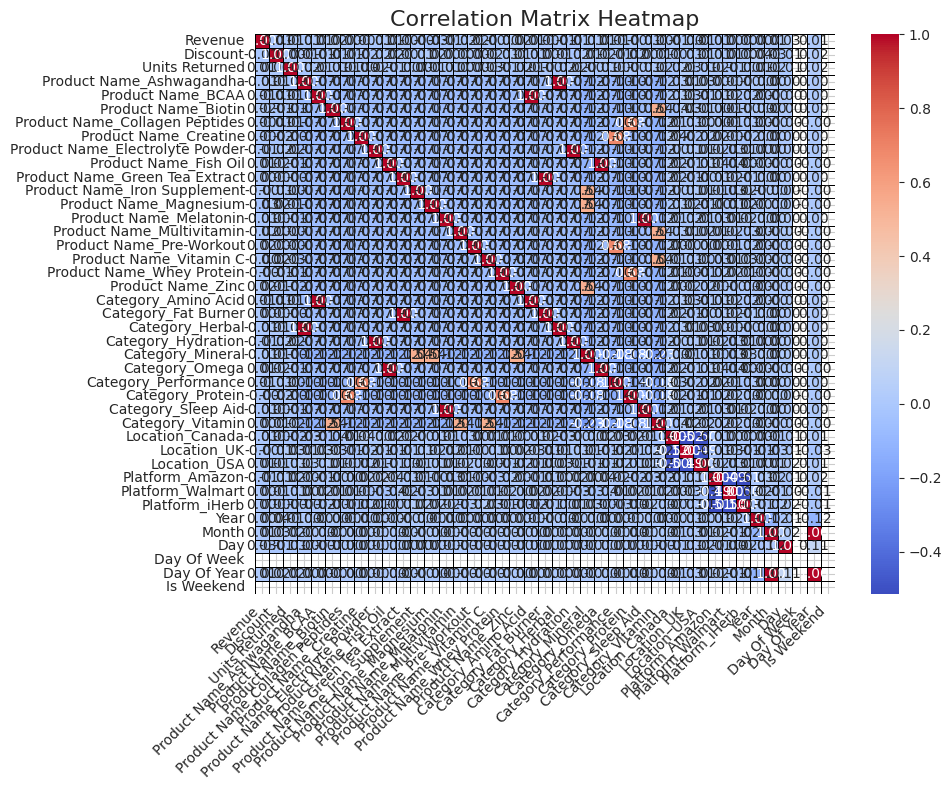

In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# The .corr() method returns a DataFrame with the correlation coefficients
corr_matrix = df_revenue.corr()

# 3. Create a heatmap to visualize the matrix
# sns.heatmap() is a function from the seaborn library
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 4. Display or save the plot
plt.show()
# Or to save it to a file:
# plt.savefig('correlation_matrix_heatmap.png')

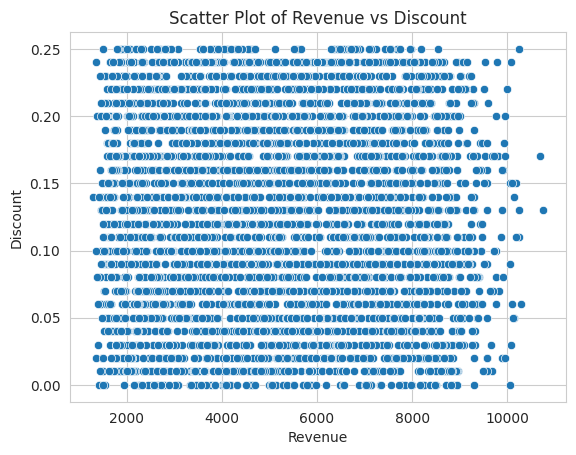

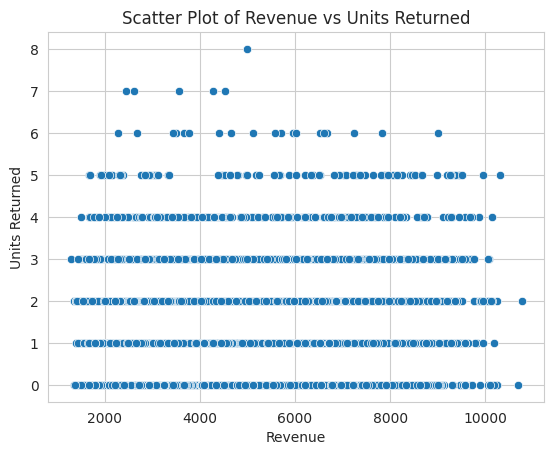

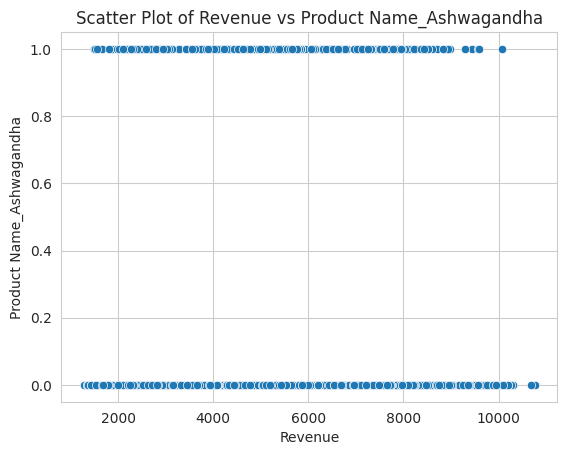

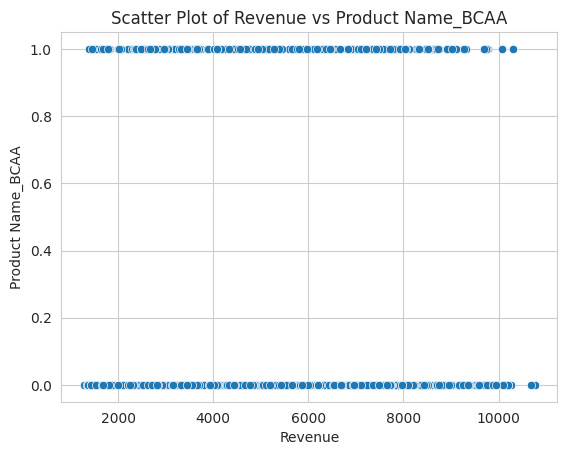

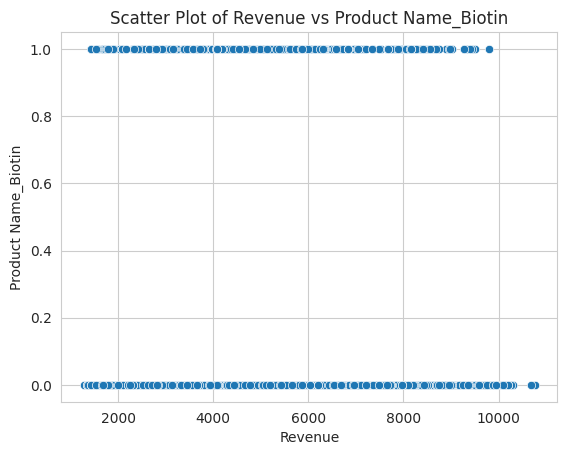

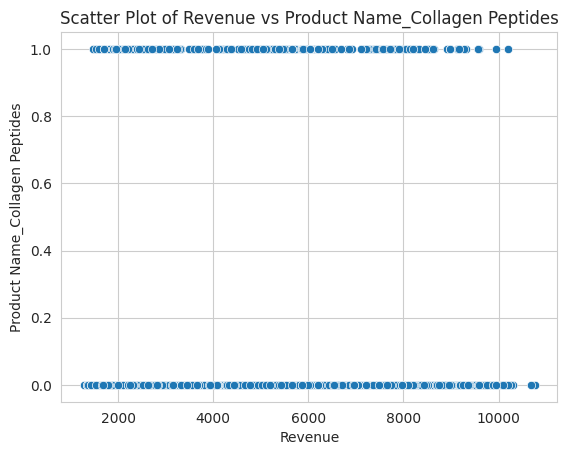

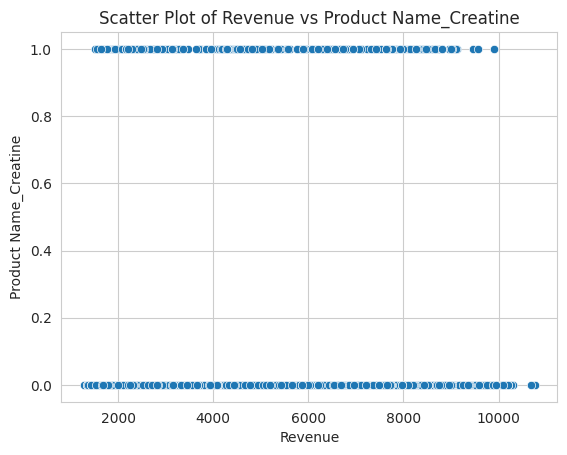

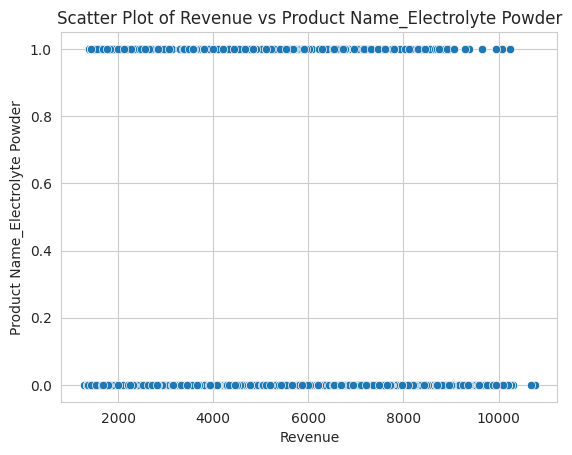

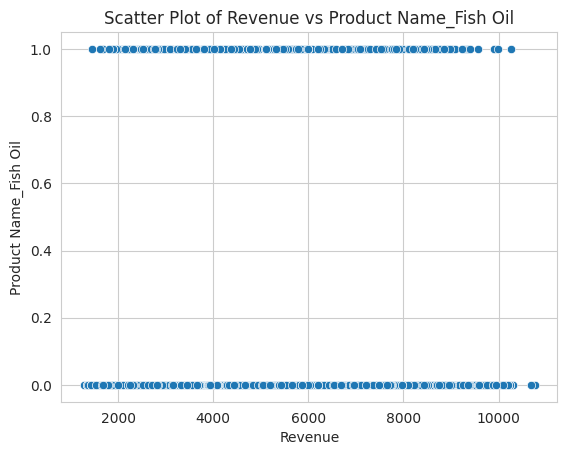

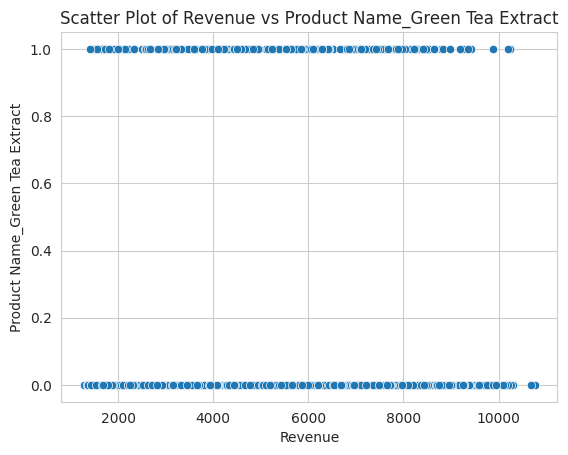

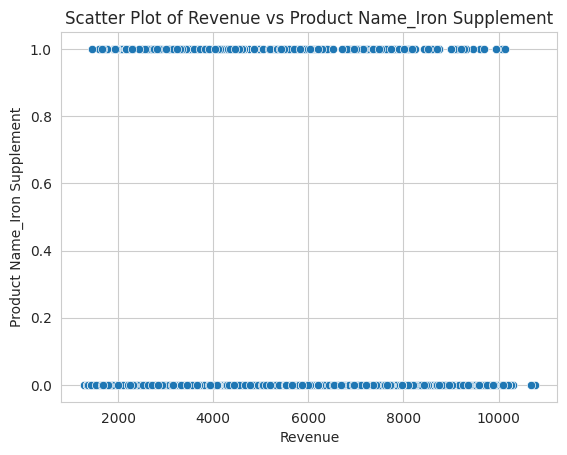

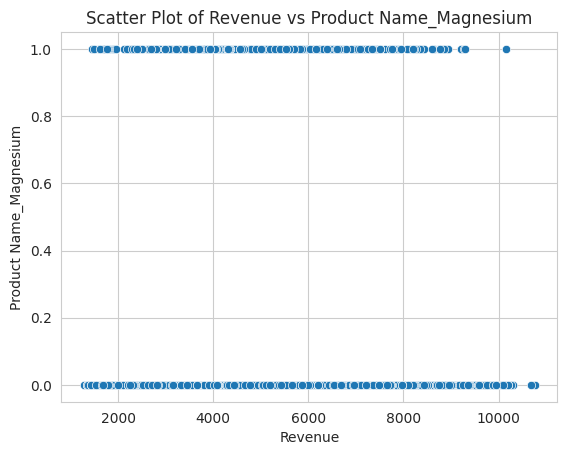

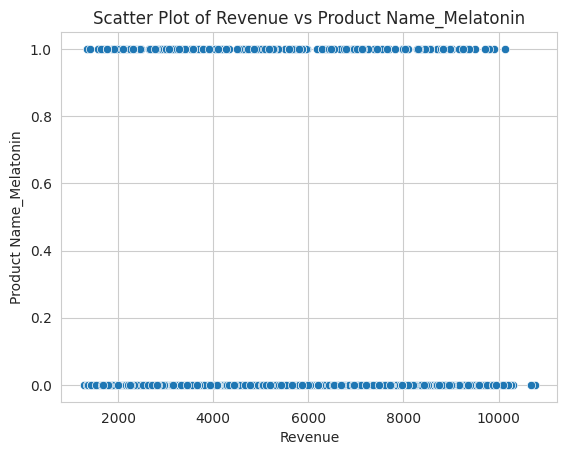

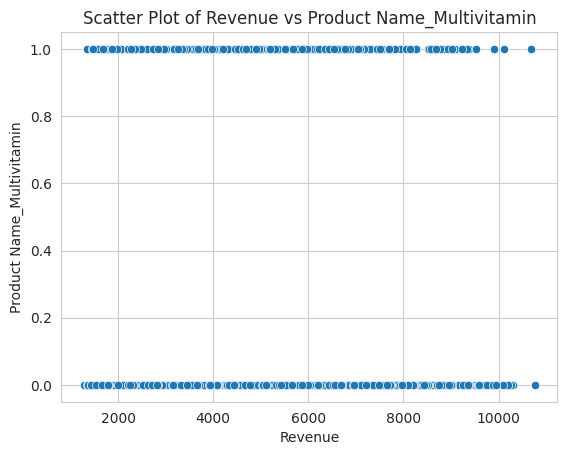

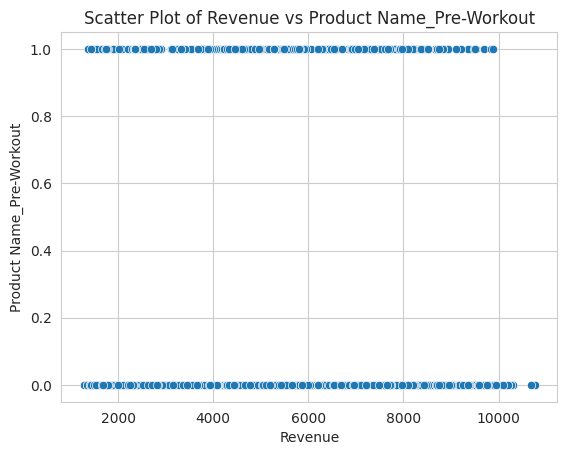

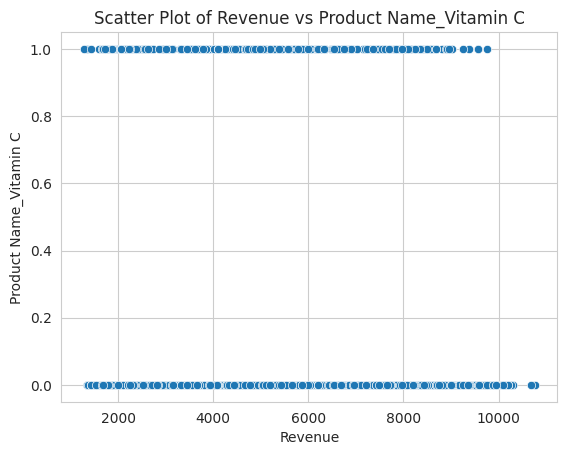

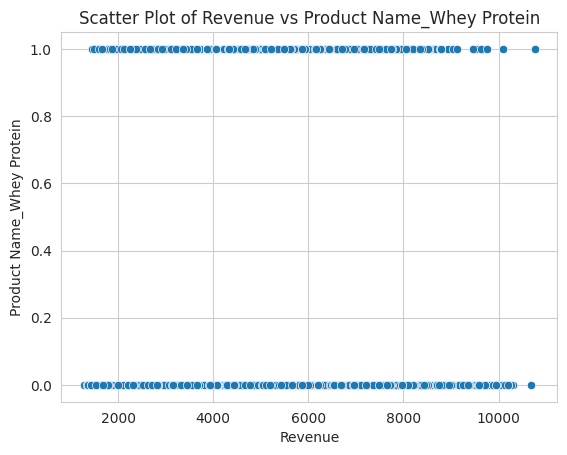

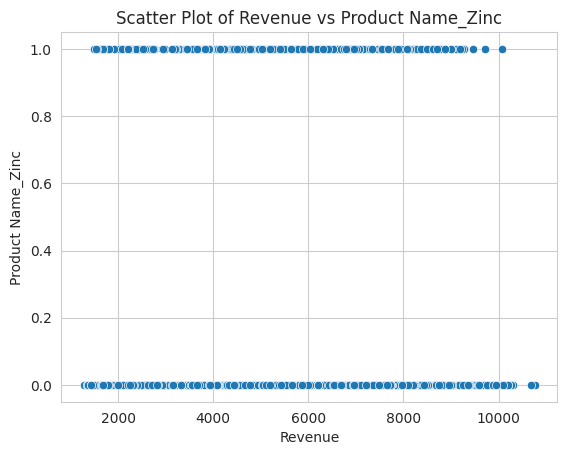

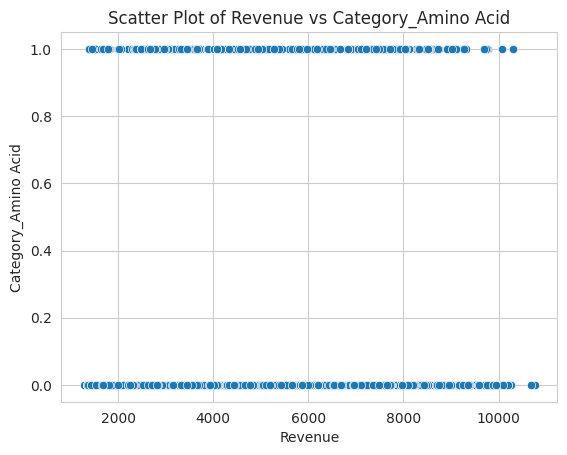

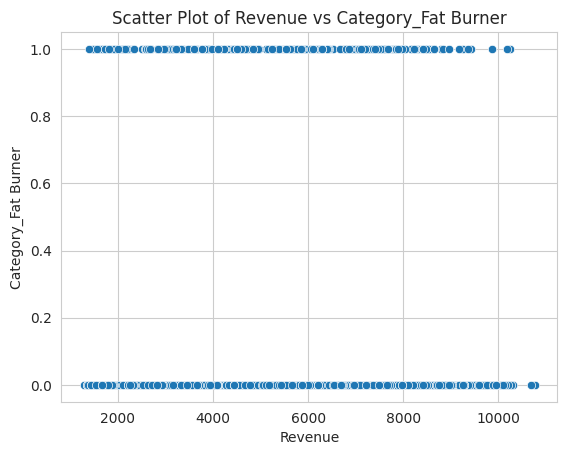

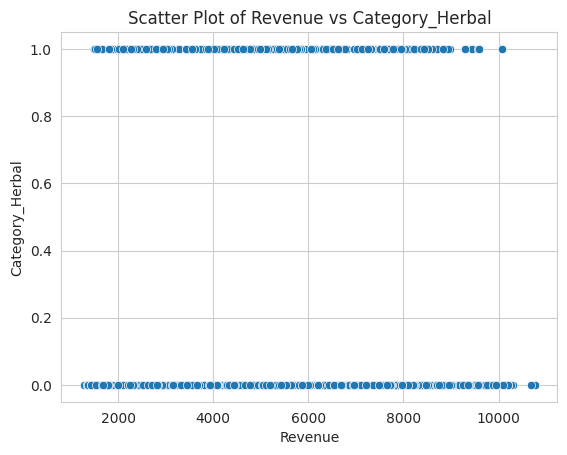

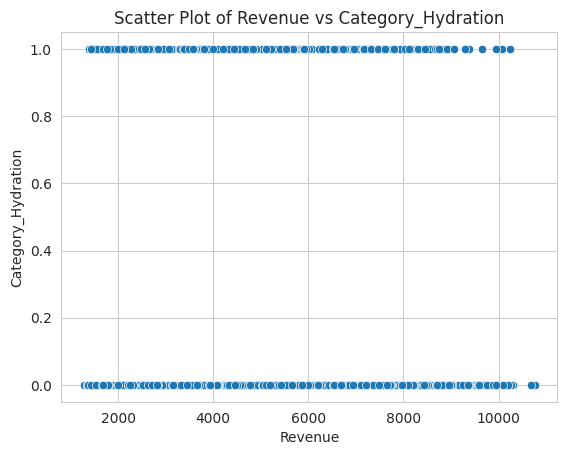

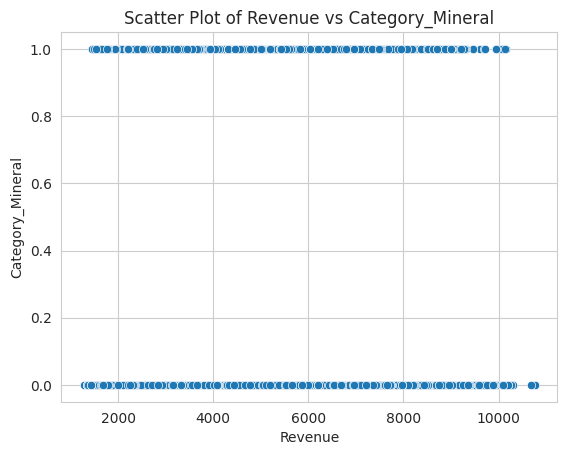

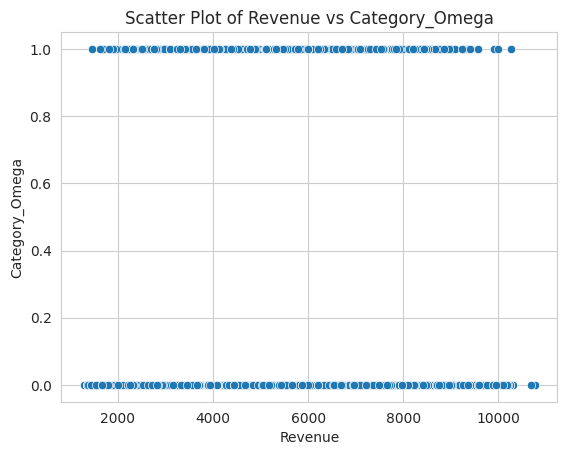

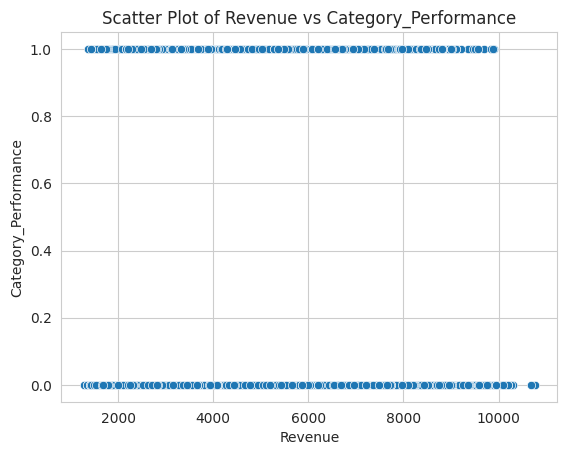

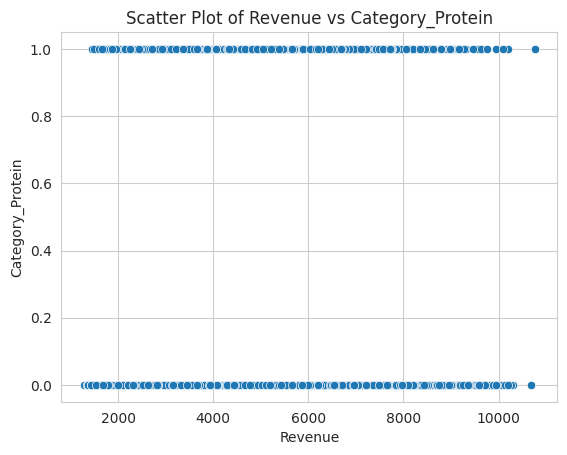

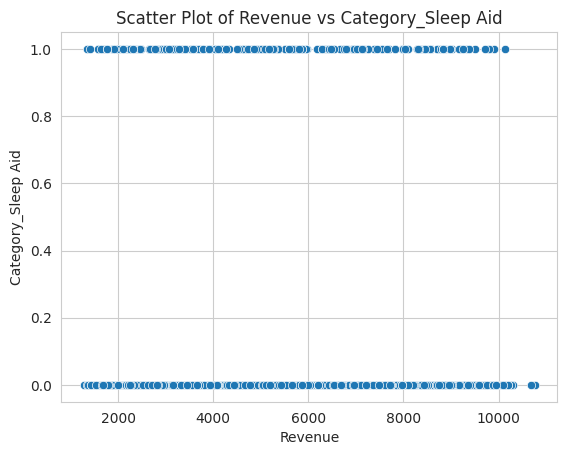

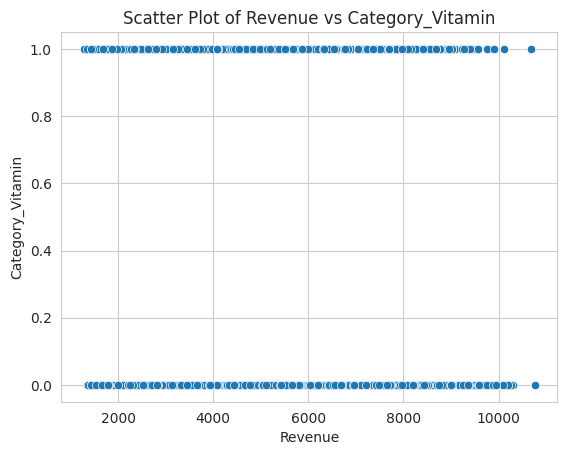

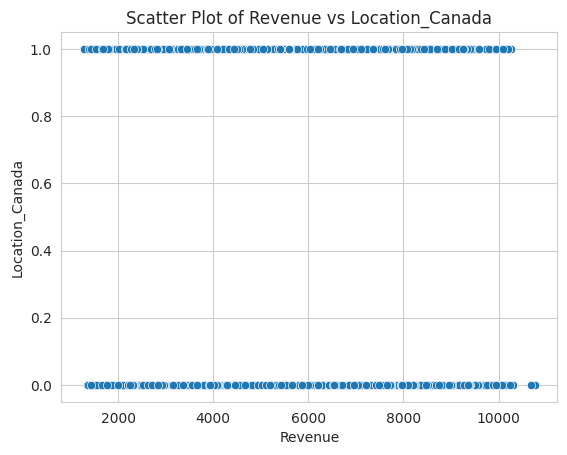

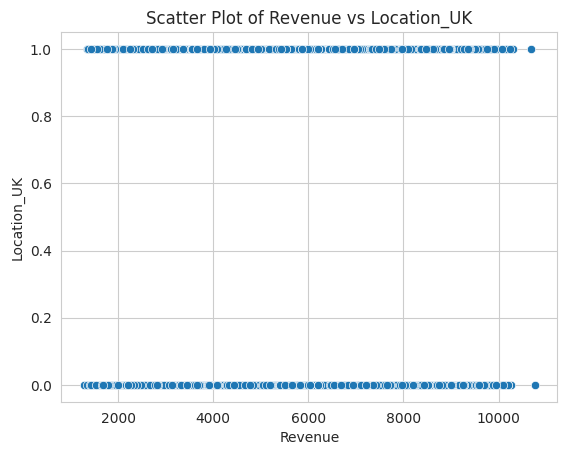

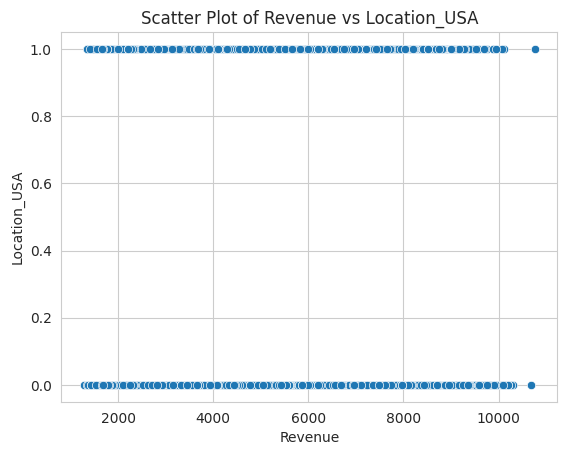

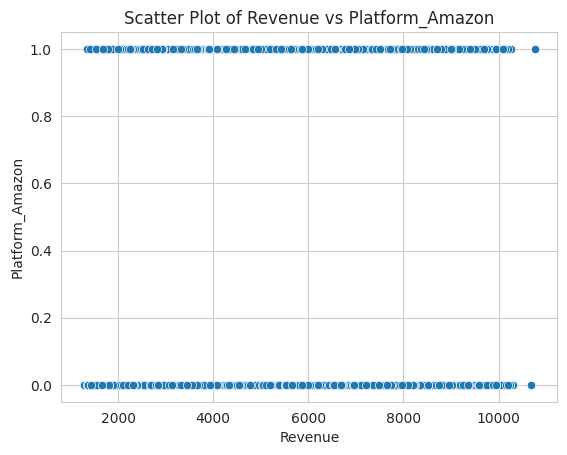

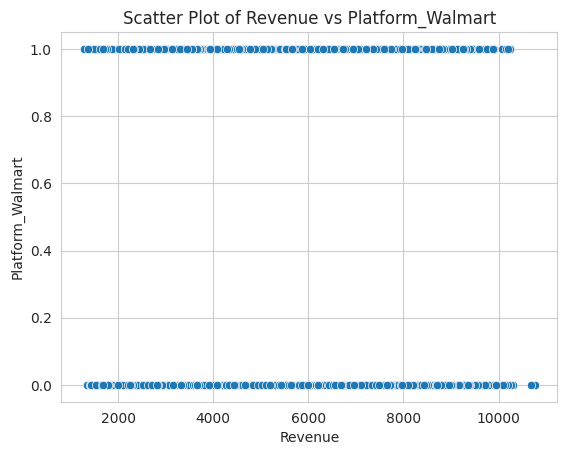

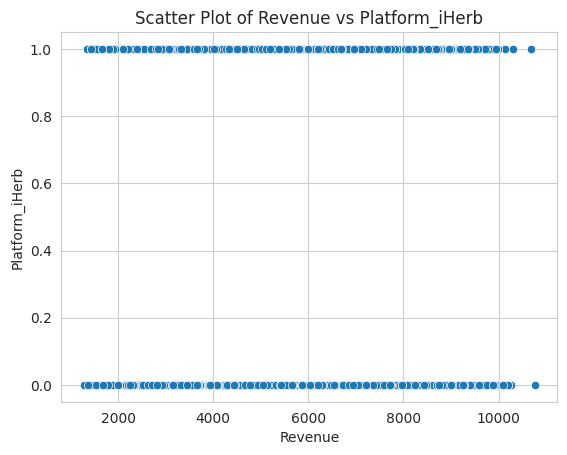

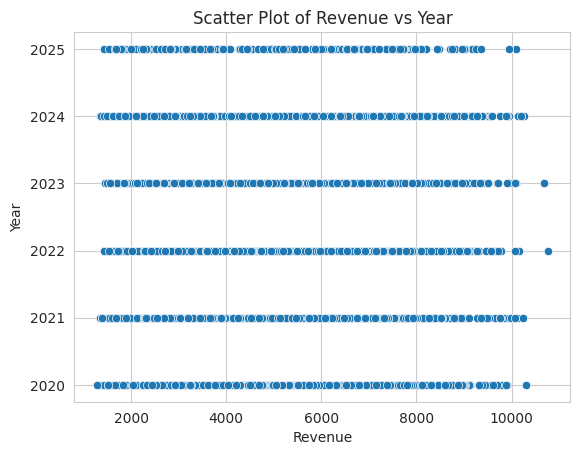

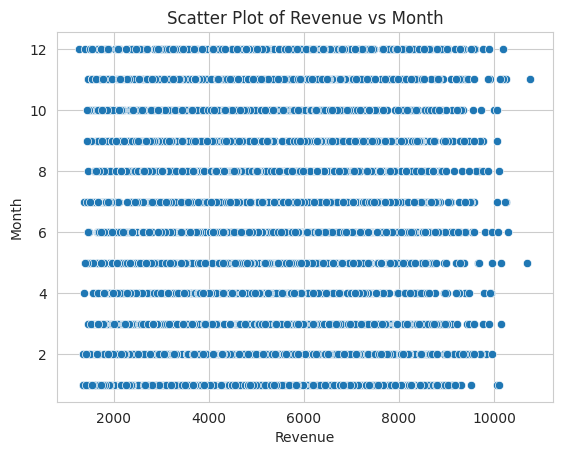

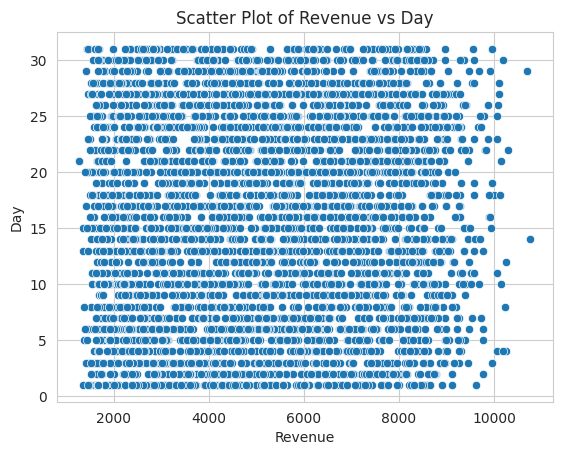

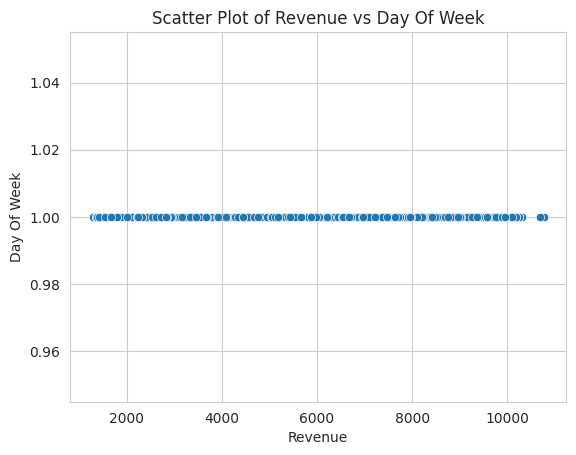

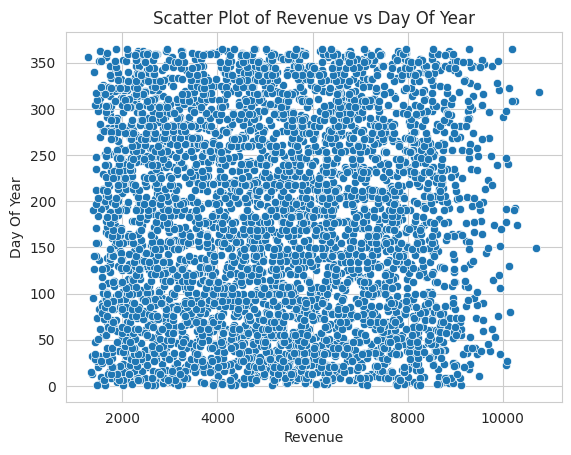

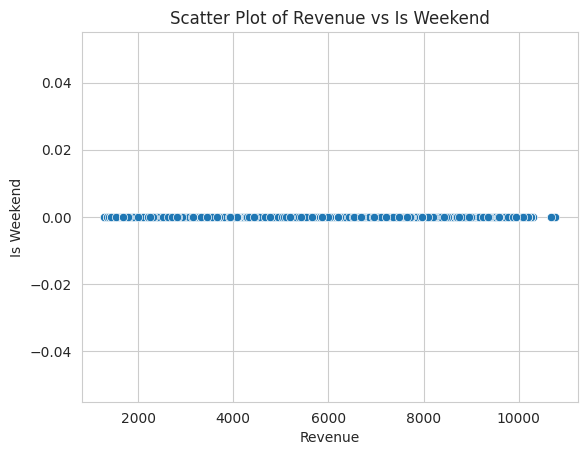

In [438]:
for field in independent:
    sns.scatterplot(x=dependent[0], y=field, data=df_revenue)
    plt.title(f'Scatter Plot of {dependent[0]} vs {field}')
    plt.show()

Podemos ver en la matriz de correlación que los datos no muestran gran correlación entre ellos. Las graficas de relacion de los ingresos con el resto de las variables muestran que no hay relacion ninguna entre ellas, con lo que podemos descartar los modelos de regresión lineal.

Pasamos a crear los dataframe para poder entrenar el modelo.

In [439]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

# Create datasets for independent and dependent variables
X = df_revenue[independent]
y = df_revenue[dependent]

# Scale the independent variables
# numeric_columns = ['Year', 'Month', 'Day', 'Day Of Year']
# boolean_colums = []
# for column in X.columns:
#     if column not in numeric_columns:
#         boolean_colums.append(column)

# numeric_transformer = StandardScaler()

# preprocessor = ColumnTransformer(
#     [
#         ('num', numeric_transformer, numeric_columns),
#         ('bool', 'passthrough', boolean_colums)
#     ]
# )

preprocessor = StandardScaler()

X_transformed = preprocessor.fit_transform(X)

# Split datasets for training and test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3945, 40)
X_test shape: (439, 40)
y_train shape: (3945, 1)
y_test shape: (439, 1)


Vamos a entrenar el modelo con Ran

In [450]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 3. Instantiate the Gradient Boosting Regressor model
# n_estimators: number of boosting stages to perform
# learning_rate: shrinks the contribution of each tree
gbr_model = GradientBoostingRegressor(random_state=42)

# Define the parameter distributions for the search
param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'min_samples_leaf': randint(1, 20),
}

# Set up the Randomized Search with cross-validation
# n_iter: The number of parameter settings to sample
# cv: The number of cross-validation folds
# n_jobs=-1: Use all available CPU cores for parallel processing
random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of different combinations to try
    cv=5,       # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Search best params
random_search.fit(X_train, y_train['Revenue'])

# 6. Print the results
print("Best hyperparameters found:")
print(random_search.best_params_)

print("\nBest cross-validated R-squared score:")
print(f"{random_search.best_score_:.4f}")

# Create the model with the best parameters
gbr_model = GradientBoostingRegressor(**random_search.best_params_, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train['Revenue'])



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found:
{'learning_rate': np.float64(0.03961738599067998), 'max_depth': 3, 'min_samples_leaf': 17, 'n_estimators': 101, 'subsample': np.float64(0.8010716092915446)}

Best cross-validated R-squared score:
-0.0111


,loss,'squared_error'
,learning_rate,np.float64(0....1738599067998)
,n_estimators,101
,subsample,np.float64(0.8010716092915446)
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,17
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Show metrics:

In [451]:
# 1. Make predictions on the test set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_pred = gbr_model.predict(X_test)

# 2. Calculate and display the metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Gradient Boosting metrics:\n")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Gradient Boosting metrics:

R-squared (R2): -0.0018
Mean Squared Error (MSE): 4666426.8995
Root Mean Squared Error (RMSE): 2160.1914
Mean Absolute Error (MAE): 1837.3676


# Conclusiones.
Con los datos disponibles, no es posible mejorar el modelo. Los siguientes pasos para intentar mejorar el modelo son:
- Variables como fines de semana la hora del día... por desgracia, no disponemos de esa información por lo que no podemos usarla.
- Crear nuevos datos usando los ya existentes (por ejemplo, se venden mejor algunas categorias dependiendo de la plataforma)?